### **Simple Linear Regression**

---

# $$ y = mX + b $$

$$ m = slope / weight, $$
$$ b = intercept / bias$$

There are two ways of finding $a$ and $b$ -

#### 1. Closed form solution - 

The values of $a$ and $b$ are calculated using the following formulas, directly - 

### $$ m = {{\sum_{i}^n (x_i - \bar{x})(y_i - \bar{y})}\over{\sum_{i}^n (x_i - \bar{x})^2}} $$

### $$ b = \bar{y} - m\bar{X} $$

#### 2. Non-Closed form solution -

The solution is derived using Gradient descent, applied on the loss function - 

### $$ J = \sum_{i = 1}^{n} d_i ^ 2 $$

### $$ \implies J = \sum_{i=1}^{n} (y_i - \hat{y}) ^ 2 $$

### $$ \implies J = \sum_{i = 1}^{n} (y_i - (mx_i + b)) ^ 2 $$

---

### Custom Linear Regression Class

In [21]:
import numpy as np

class CustomLinearRegression:
    def __init__(self):
        self.weight= None
        self.bias = None
        
    def fit(self, X:np.ndarray, y:np.ndarray):
        if(len(X) != len(y)):
            raise Exception(f"shape mismatch {X.shape}, {y.shape}")
         
        X_mean = X.mean()
        y_mean = y.mean()
        
        numerator = np.sum(np.multiply(X - X_mean, y - y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        
        self.weight= numerator / denominator
        self.bias = y_mean - self.weight * X_mean
        return
    
    def predict(self, X:np.ndarray):
        return self.weight * X + self.bias

---

### Scikit Learn Linear Regression

In [11]:
import os
import pandas as pd

In [12]:
path = os.path.join("..","..", "data","placement.csv")
df = pd.read_csv(path)
df.sample(5)

,cgpa,package
194,7.89,3.67
110,8.18,3.76
107,6.33,2.59
60,5.61,2.19
48,8.63,4.09


In [13]:
# data analysis

df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


<Axes: xlabel='cgpa', ylabel='package'>

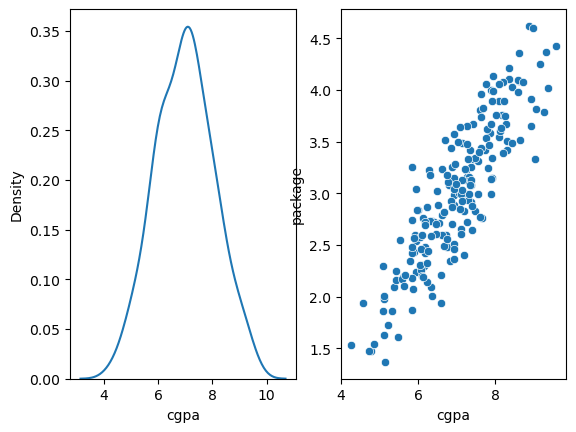

In [14]:
# dist analysis

import seaborn as sns
import matplotlib.pyplot as plt

fig, (first, second) = plt.subplots(ncols=2)
sns.kdeplot(df, x="cgpa", ax=first)
sns.scatterplot(df, x="cgpa", y="package", ax=second)

In [15]:
# handling outliers

from sklearn.base import BaseEstimator
import numpy as np

class OutlierHandling(BaseEstimator):
    def __init__(self):
        self.upper_limit = None
        self.lower_limit = None

    def fit(self, X, y = None):
        self.upper_limit = X.mean() + 3 * X.std()
        self.lower_limit = X.mean() - 3 * X.std()
        return

    def transform(self, X, y = None):
        return np.where(
            X > self.upper_limit,
            self.upper_limit,
            np.where(
                X < self.lower_limit,
                self.lower_limit,
                X
            )
        )

    def fit_transform(self, X, y = None):
        self.fit(X)
        return self.transform(X)

In [25]:
# Linear regression pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline(
    [
        ("outlier", OutlierHandling()),
        ("scaler", StandardScaler()),
        ("regression", LinearRegression())
    ]
)

In [26]:
# calculate accuracy
from sklearn.model_selection import cross_val_score, train_test_split

X = df["cgpa"]
y = df["package"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
cross_val_score(pipe, X.values.reshape(-1, 1), y, cv = 5).mean()

0.7582150904066856

---